<a href="https://colab.research.google.com/github/cepdnaclk/e18-4yp-Predicting-Forex-Currency-Exchange-Rate-using-Machine-Learning/blob/main/models/LKRUSD/LKRUSD_IN2_LSTM_Bayesian_Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta
!pip install bayesian-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=35030b4e10beefcd8fb0c311ed7ab4f40e7a60bb0830964bc47251b6657b58af
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas as pd
import pandas_ta as ta

data = pd.read_csv('LKR=X (3).csv')
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-09,173.020004,176.050003,172.539993,176.050003,176.050003,0.0
1,2019-07-10,172.490005,176.050003,172.479996,176.050003,176.050003,0.0
2,2019-07-11,171.839996,176.050003,171.839996,176.050003,176.050003,0.0
3,2019-07-12,172.630005,176.050003,172.360001,176.050003,176.050003,0.0
4,2019-07-15,172.160004,175.639999,172.160004,176.050003,176.050003,0.0
...,...,...,...,...,...,...,...
1301,2024-07-03,301.586273,301.628357,301.081665,302.451538,302.451538,0.0
1302,2024-07-04,300.190399,300.962646,300.190399,301.081665,301.081665,0.0
1303,2024-07-05,NaN,NaN,NaN,NaN,NaN,NaN
1304,2024-07-08,301.584656,301.584656,301.255280,301.793793,301.793793,0.0


In [ ]:
data['T-4'] = data['Close']
data['T-3'] = data['Close'].shift(-1)
data['T-2'] = data['Close'].shift(-2)
data['T-1'] = data['Close'].shift(-3)
data['T0'] = data['Close'].shift(-4)

#data['SMA_5_H'] = ta.sma(data['High'], length=5).shift(-4)
#data['SMA_5_L'] = ta.sma(data['Low'], length=5).shift(-4)
data['EMA_5_C'] = ta.ema(data['Close'], length=5).shift(-4)
data['RSI'] = ta.rsi(data['Close'], length=14).shift(-14)

#Closing value of the next day
data['T_F'] = data['Close'].shift(-5)

print(data.head(10))


         Date        Open        High         Low       Close   Adj Close  \
0  2019-07-09  173.020004  176.050003  172.539993  176.050003  176.050003   
1  2019-07-10  172.490005  176.050003  172.479996  176.050003  176.050003   
2  2019-07-11  171.839996  176.050003  171.839996  176.050003  176.050003   
3  2019-07-12  172.630005  176.050003  172.360001  176.050003  176.050003   
4  2019-07-15  172.160004  175.639999  172.160004  176.050003  176.050003   
5  2019-07-16  172.869995  175.889999  172.869995  175.639999  175.639999   
6  2019-07-17  172.779999  175.649994  172.779999  175.660004  175.660004   
7  2019-07-18  172.429993  175.669998  172.429993  175.589996  175.589996   
8  2019-07-19  171.850006  175.759995  171.850006  175.649994  175.649994   
9  2019-07-22  173.000000  175.839996  173.000000  172.759995  172.759995   

   Volume         T-4         T-3         T-2         T-1          T0  \
0     0.0  176.050003  176.050003  176.050003  176.050003  176.050003   
1     

In [ ]:
#MACD calculation
# Calculate the 12-period EMA
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-period EMA
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD Line
data['MACD_Line'] = data['EMA_12'] - data['EMA_26']

# Calculate the Signal Line (9-period EMA of the MACD Line)
data['Signal_Line'] = data['MACD_Line'].ewm(span=9, adjust=False).mean()

# Calculate the MACD Histogram
data['MACD_Histogram'] = data['MACD_Line'] - data['Signal_Line']

In [ ]:
#ROC Calculations

# Calculate the 2 day ROC
data['ROC2'] = ((data['Close'] - data['Close'].shift(2)) / data['Close'].shift(2)) * 100

# Calculate the 4 day ROC
data['ROC4'] = ((data['Close'] - data['Close'].shift(4)) / data['Close'].shift(4)) * 100

# Calculate the 10 day ROC
data['ROC10'] = ((data['Close'] - data['Close'].shift(10)) / data['Close'].shift(10)) * 100

In [ ]:
print(data.tail(10))

            Date        Open        High         Low       Close   Adj Close  \
1296  2024-06-26  302.377350  302.377350  302.257019  302.150299  302.150299   
1297  2024-06-27  302.367401  302.784454  302.367401  302.257019  302.257019   
1298  2024-06-28  302.504517  302.815582  302.504517  302.784454  302.784454   
1299  2024-07-01  301.717865  302.067780  301.717865  302.458130  302.458130   
1300  2024-07-02  302.434967  302.451538  302.434967  302.067780  302.067780   
1301  2024-07-03  301.586273  301.628357  301.081665  302.451538  302.451538   
1302  2024-07-04  300.190399  300.962646  300.190399  301.081665  301.081665   
1303  2024-07-05         NaN         NaN         NaN         NaN         NaN   
1304  2024-07-08  301.584656  301.584656  301.255280  301.793793  301.793793   
1305  2024-07-09  303.690002  303.959991  303.369995  303.369995  303.369995   

      Volume         T-4         T-3         T-2  ...  RSI         T_F  \
1296     0.0  302.150299  302.257019  302.784

In [ ]:
# Dropping NaN values
data.dropna(inplace=True)

print(data.tail(10))


            Date        Open        High         Low       Close   Adj Close  \
1282  2024-06-06  298.705231  299.649506  298.705231  299.216644  299.216644   
1283  2024-06-07  299.100616  299.451355  299.100616  299.052551  299.052551   
1284  2024-06-10  302.564423  303.249542  299.640289  301.465210  301.465210   
1285  2024-06-11  299.105804  300.489960  299.105804  299.640289  299.640289   
1286  2024-06-12  300.184906  300.184906  298.853668  300.489960  300.489960   
1287  2024-06-13  297.405396  301.337433  297.405396  298.886993  298.886993   
1288  2024-06-14  302.300140  302.300140  300.788269  301.337433  301.337433   
1289  2024-06-17  300.705383  300.705383  300.450409  300.602875  300.602875   
1290  2024-06-18  299.776001  301.782745  299.776001  300.450409  300.450409   
1291  2024-06-19  301.202362  302.005829  301.167297  301.782745  301.782745   

      Volume         T-4         T-3         T-2  ...        RSI         T_F  \
1282     0.0  299.216644  299.052551  3

In [ ]:
data = data[['Date', 'T-4','T-3','T-2','T-1','T0','EMA_5_C','RSI','MACD_Histogram','ROC2','ROC4','ROC10','T_F']]

data

,Date,T-4,T-3,T-2,T-1,T0,EMA_5_C,RSI,MACD_Histogram,ROC2,ROC4,ROC10,T_F
10,2019-07-23,175.779999,175.960007,176.119995,176.089996,176.100006,175.885536,56.974691,-0.139998,0.074014,0.068311,-0.153368,176.110001
11,2019-07-24,175.960007,176.119995,176.089996,176.100006,176.110001,175.960357,57.093022,-0.062213,1.852288,0.210724,-0.051120,176.160004
12,2019-07-25,176.119995,176.089996,176.100006,176.110001,176.160004,176.026906,57.219907,0.001384,0.193421,0.267578,0.039757,176.220001
13,2019-07-26,176.089996,176.100006,176.110001,176.160004,176.220001,176.091271,64.644435,0.040626,0.073874,1.927530,0.022717,176.419998
14,2019-07-29,176.100006,176.110001,176.160004,176.220001,176.419998,176.200847,58.066981,0.065007,-0.011350,0.182050,0.028403,176.570007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,2024-06-13,298.886993,301.337433,300.602875,300.450409,301.782745,300.835615,60.370442,0.157630,-0.251400,-0.055361,0.098597,302.005829
1288,2024-06-14,301.337433,300.602875,300.450409,301.782745,302.005829,301.225686,52.184347,0.219938,0.282030,-0.042385,0.907885,301.964508
1289,2024-06-17,300.602875,300.450409,301.782745,302.005829,301.964508,301.471960,52.184347,0.193691,0.574091,0.321247,1.068207,301.443451
1290,2024-06-18,300.450409,301.782745,302.005829,301.964508,301.443451,301.462457,52.184347,0.150023,-0.294362,-0.013162,0.604270,302.060181


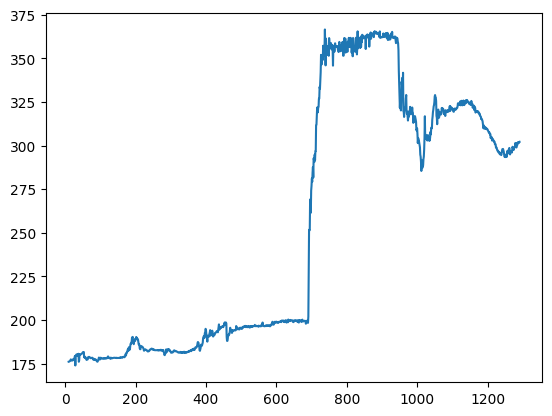

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['T_F'])

In [ ]:
dates=data['Date'].to_numpy()
middle_matrix =data[['T-4','T-3','T-2','T-1','T0','EMA_5_C','RSI','MACD_Histogram','ROC2','ROC4','ROC10']].to_numpy()
X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
Y=data['T_F']

print(dates.shape)
print(X.shape)
print(Y.shape)

(1282,)
(1282, 11, 1)
(1282,)


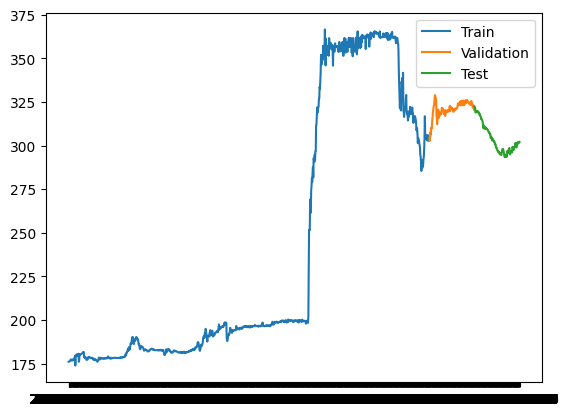

In [ ]:
q_80 = int(len(dates) * .8) #change to 0.8
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], Y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], Y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization
import numpy as np
import time

def evaluate_network(lstm_units_1,epochs,learning_rate,dense_units_1,dense_units_2,dense_units_3):

  lstm_units_1=int(lstm_units_1)
  epochs=int(epochs)
  dense_units_1=int(dense_units_1)
  dense_units_2=int(dense_units_2)
  dense_units_3=int(dense_units_3)

  model = Sequential([layers.Input((11, 1)),
                      layers.LSTM(lstm_units_1),
                      layers.Dense(dense_units_1, activation='relu'),
                      layers.Dense(dense_units_2, activation='relu'),
                      layers.Dense(dense_units_3, activation='relu'),
                      layers.Dense(1)])

  model.compile(loss='mse',
                optimizer=Adam(learning_rate=learning_rate),
                metrics=['mean_absolute_error'])


  # Train the model
  history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0)

  # Return the loss (or another metric that you want to minimize)
  val_loss=min(history.history['val_loss'])
  loss=min(history.history['loss'])

  return -(val_loss*loss)  # Negative because BayesianOptimization maximizes, but we want to minimize loss



pbounds = {
    'lstm_units_1': (20, 300),
    'learning_rate': (1e-6, 1e-2),
    'epochs': (10, 300),
    'dense_units_1': (10, 200),
    'dense_units_2': (10, 200),
    'dense_units_3': (10, 200)
}

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(
    f=evaluate_network,
    pbounds=pbounds,
    verbose=2,
    random_state=1,
    )

# Run the optimization
start_time = time.time()
optimizer.maximize(init_points=12, n_iter=12)
time_took = (time.time() - start_time)/60


# Get the best hyperparameters
print(f"Total runtime in mins: {time_took}")
best_params = optimizer.max['params']
print(f"Best hyperparameters: {best_params}")



|   iter    |  target   | dense_... | dense_... | dense_... |  epochs   | learni... | lstm_u... |
-------------------------------------------------------------------------------------------------
| 1         | -308.9    | 89.23     | 146.9     | 10.02     | 97.68     | 0.001468  | 45.85     |
| 2         | -68.59    | 45.39     | 75.66     | 85.39     | 166.3     | 0.004193  | 211.9     |
| 3         | -91.43    | 48.85     | 176.8     | 15.2      | 204.4     | 0.004174  | 176.4     |
| 4         | -63.8     | 36.67     | 47.64     | 162.1     | 290.8     | 0.003135  | 213.9     |
| 5         | -125.2    | 176.5     | 180.0     | 26.16     | 21.33     | 0.001699  | 265.9     |
| 6         | -9.66e+03 | 28.69     | 90.01     | 192.0     | 164.6     | 0.006919  | 108.3     |
| 7         | -1.177e+0 | 140.4     | 168.6     | 13.47     | 227.5     | 0.009889  | 229.5     |
| 8         | -5.613e+0 | 63.28     | 160.0     | 29.61     | 139.9     | 0.009086  | 102.2     |
| 9         | -66.61

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# model = Sequential([layers.Input((9, 1)),
#                     layers.LSTM(64),
#                     layers.Dense(1)])

model = Sequential([layers.Input((11, 1)),
                   layers.LSTM(100),
                   layers.Dense(50, activation='relu'),
                   layers.Dense(20, activation='relu'),
                   layers.Dense(10, activation='relu'),
                   layers.Dense(5, activation='relu'),
                   layers.Dense(2, activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.00009),
              metrics=['mean_absolute_error'])


history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

print(history.history.keys())

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Epoch 1/100
32/32 [==============================] - 4s 28ms/step - loss: 60092.6914 - mean_absolute_error: 233.6700 - val_loss: 98229.3672 - val_mean_absolute_error: 313.2568
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 60091.3438 - mean_absolute_error: 233.6672 - val_loss: 98227.5781 - val_mean_absolute_error: 313.2539
Epoch 3/100
32/32 [==============================] - 0s 10ms/step - loss: 60090.0000 - mean_absolute_error: 233.6643 - val_loss: 98225.7812 - val_mean_absolute_error: 313.2511
Epoch 4/100
32/32 [==============================] - 0s 11ms/step - loss: 60088.6523 - mean_absolute_error: 233.6614 - val_loss: 98223.9688 - val_mean_absolute_error: 313.2482
Epoch 5/100
32/32 [==============================] - 0s 11ms/step - loss: 60087.3125 - mean_absolute_error: 233.6586 - val_loss: 98222.1719 - val_mean_absolute_error: 313.2453
Epoch 6/100
32/32 [==============================] - 0s 10ms/step - loss: 60085.9609 - mean_absolute_error: 233.6557 - v

KeyboardInterrupt: 

32/32 [==============================] - 1s 13ms/step


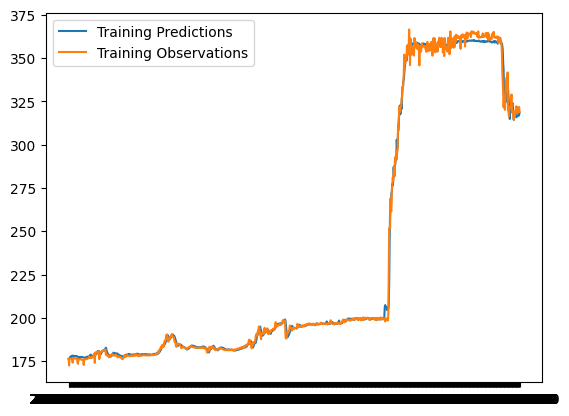

In [ ]:
from sklearn.metrics import mean_squared_error

train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

158.95921002578586


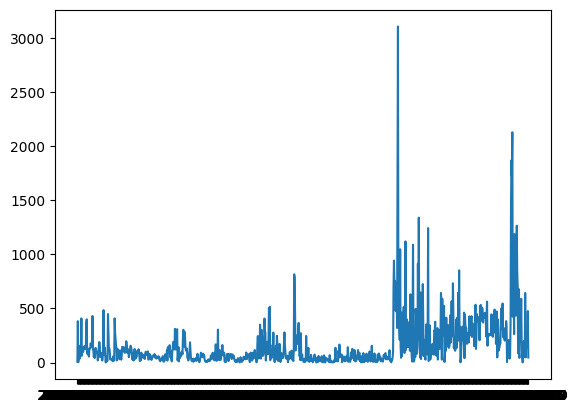

In [ ]:
basis_point_value=0.01  #For USDLKR pair
train_data_basis_point_diff=((train_predictions/basis_point_value).flatten()-y_train/basis_point_value).abs()
plt.plot(dates_train, train_data_basis_point_diff)

average_train_data_basis_point_diff=np.mean(train_data_basis_point_diff)
print(average_train_data_basis_point_diff)

4/4 [==============================] - 0s 9ms/step


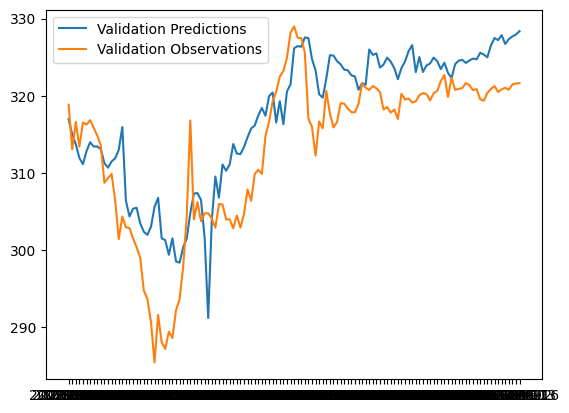

In [ ]:
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])


798.0049785187014


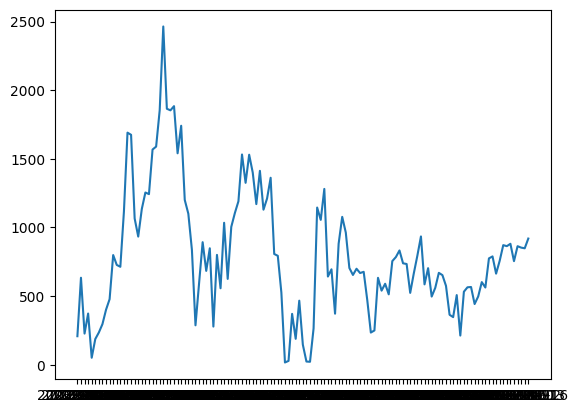

In [ ]:
basis_point_value=0.01  #For USDLKR pair
validation_data_basis_point_diff=((val_predictions/basis_point_value).flatten()-y_val/basis_point_value).abs()
plt.plot(dates_val, validation_data_basis_point_diff)

print(np.mean(validation_data_basis_point_diff))

4/4 [==============================] - 0s 12ms/step


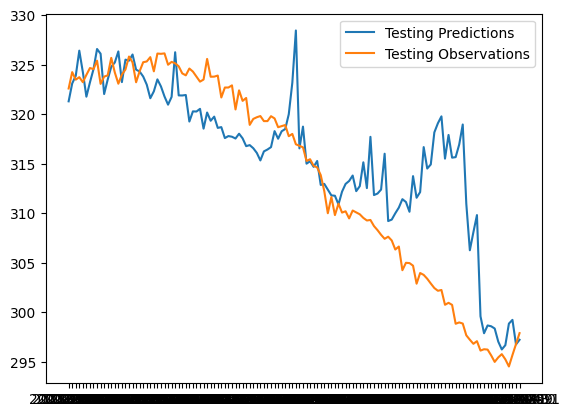

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

207.55116618652343


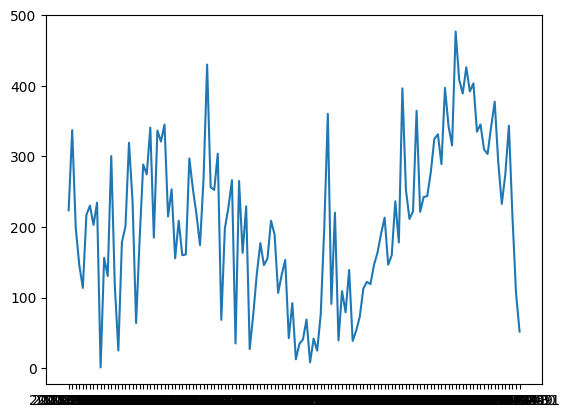

In [ ]:
basis_point_value=0.01  #For USDLKR pair
test_data_basis_point_diff=((test_predictions/basis_point_value).flatten()-y_test/basis_point_value).abs()
plt.plot(dates_test, test_data_basis_point_diff)

print(np.mean(test_data_basis_point_diff))

In [ ]:
#Start Trading with 1000 LKR with model


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_predictions[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_predictions[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)


129
1019.451710040545
base


In [ ]:
#Start Trading with 1000 USD LKR actual values


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_data[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_data[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)

129
1112.0582385768728
base


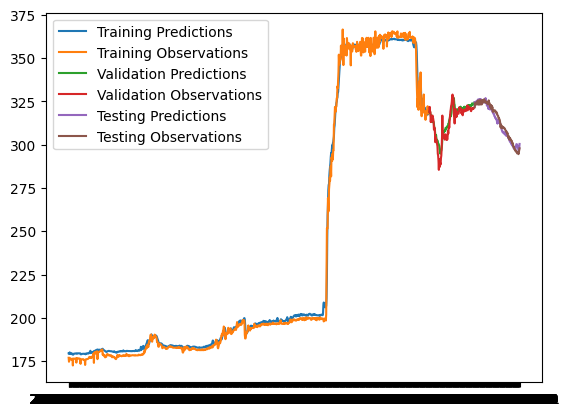

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

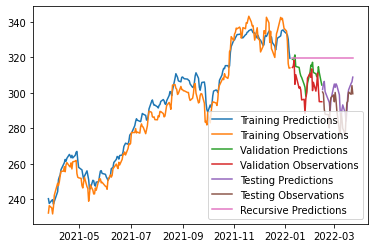

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])